**PROJECT:** Integration of machine learning, QSAR, and polypharmacology for multitarget drug discovery in neuropsychiatric disorders: Prediction of serotonergic and dopaminergic receptor inhibitors

MSc. Caroline Mensor Folchini (UFPR)

***Code by Alexandre de F. Cobre*** [Github](https://github.com/AlexandreCOBRE/code)

# Exploratory Data Analysis

In [ ]:
# Tasks to be performed:
## Step 1: Import libraries
## Step 2: Import the database
## Step 3: Calculate the parameters of Lipinki's rule of five
## Step 4: Normalize IC50 values
## Step 5: Carry out the exploratory analysis itself
## Step 6: Draw insights from the results of the exploratory analysis

# Step 1: Import libraries

In [ ]:
!pip install rdkit
import rdkit
import pandas as pd

# Step 2: Import the database

In [ ]:
# Step 2: Import dataset form 2021

from google.colab import files
uploaded = files.upload()

Saving DA_5HT_concatenated_data.csv to DA_5HT_concatenated_data.csv


In [ ]:
df = pd.read_csv("DA_5HT_concatenated_data.csv")
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL303519,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,Intermediate,9800.0
1,CHEMBL292943,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,Active,50.0
2,CHEMBL61682,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,Active,25.0
3,CHEMBL64487,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,Active,360.0
4,CHEMBL64597,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,Active,300.0
...,...,...,...,...
5623,CHEMBL4864918,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(Cl)c...,Inactive,273.0
5624,CHEMBL5398630,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(C)c3...,Active,225.0
5625,CHEMBL3183055,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(Cl)c...,Active,628.0
5626,CHEMBL2017291,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3ccc(Cl)c(...,Inactive,324.0


# Step 3: Calculate the parameters of Lipink's rule of five

In [ ]:
## 3.1.  Importando bibliotecas
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
## 3.2. Obtendo os descritores de Lipinsk
# Inspirado em : https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descritores = pd.DataFrame(data=baseData,columns=columnNames)

    return descritores

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,342.446,3.37000,0.0,4.0
1,360.461,3.47440,0.0,5.0
2,365.427,4.34900,0.0,3.0
3,360.461,3.47440,0.0,5.0
4,336.464,3.52730,0.0,5.0
...,...,...,...,...
5623,479.068,5.46902,1.0,4.0
5624,472.677,5.43246,1.0,4.0
5625,513.513,6.12242,1.0,4.0
5626,549.974,6.54422,1.0,4.0


In [ ]:
# Reading the initial dataframe
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL303519,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,Intermediate,9800.0
1,CHEMBL292943,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,Active,50.0
2,CHEMBL61682,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,Active,25.0
3,CHEMBL64487,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,Active,360.0
4,CHEMBL64597,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,Active,300.0
...,...,...,...,...
5623,CHEMBL4864918,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(Cl)c...,Inactive,273.0
5624,CHEMBL5398630,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(C)c3...,Active,225.0
5625,CHEMBL3183055,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(Cl)c...,Active,628.0
5626,CHEMBL2017291,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3ccc(Cl)c(...,Inactive,324.0


In [ ]:
## 3.2. Concatenating the two databases
df_combinado = pd.concat([df,df_lipinski], axis = 1)

In [ ]:
display(df_combinado)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL303519,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,Intermediate,9800.0,342.446,3.37000,0.0,4.0
1,CHEMBL292943,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,Active,50.0,360.461,3.47440,0.0,5.0
2,CHEMBL61682,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,Active,25.0,365.427,4.34900,0.0,3.0
3,CHEMBL64487,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,Active,360.0,360.461,3.47440,0.0,5.0
4,CHEMBL64597,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,Active,300.0,336.464,3.52730,0.0,5.0
...,...,...,...,...,...,...,...,...
5623,CHEMBL4864918,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(Cl)c...,Inactive,273.0,479.068,5.46902,1.0,4.0
5624,CHEMBL5398630,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(C)c3...,Active,225.0,472.677,5.43246,1.0,4.0
5625,CHEMBL3183055,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(Cl)c...,Active,628.0,513.513,6.12242,1.0,4.0
5626,CHEMBL2017291,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3ccc(Cl)c(...,Inactive,324.0,549.974,6.54422,1.0,4.0


In [ ]:
## 3.4. Descriptive analysis of non-standardized IC50 values
df_combinado.standard_value.describe()

,standard_value
count,5.628000e+03
mean,5.058314e+03
std,1.761203e+04
min,3.000000e-10
25%,4.490000e+01
50%,4.200000e+02
75%,4.000000e+03
max,5.800000e+05


# Step 4: Normalize IC50 values

To ensure normal data distribution, we will convert the IC50 values ​​to a negative logarithmic scale: -log10.
To do this we will create the function "pIC50 ()" we will:
a) First multiply all IC50 values ​​by 10-9, converting nM into M.
b) Second: From these results (M unit), we will calculate the "-log10".
Finally, we will delete the variable that contains original IC50 values ​​(non-standardized data) and create a new column with pIC50 values.

In [ ]:
## 4.1. Creating the pIC50 function
# Indpired em: https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)

    return x

In [ ]:
## Important note:
# Values ​​greater than 100,000,000 will be set to 100,000,000
# otherwise the negative logarithmic value will become negative.

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
## 4.2 Creating standardized normal values

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value',axis = 1)

    return x

In [ ]:
# We will first apply the normal_value() function, it is important to note that the "standar_value" variable is normalized

In [ ]:
## 4.3. Viewing the data with normal values
df_normal = norm_value(df_combinado)
display(df_normal)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL303519,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,Intermediate,342.446,3.37000,0.0,4.0,9800.0
1,CHEMBL292943,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,Active,360.461,3.47440,0.0,5.0,50.0
2,CHEMBL61682,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,Active,365.427,4.34900,0.0,3.0,25.0
3,CHEMBL64487,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,Active,360.461,3.47440,0.0,5.0,360.0
4,CHEMBL64597,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,Active,336.464,3.52730,0.0,5.0,300.0
...,...,...,...,...,...,...,...,...
5623,CHEMBL4864918,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(Cl)c...,Inactive,479.068,5.46902,1.0,4.0,273.0
5624,CHEMBL5398630,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(C)c3...,Active,472.677,5.43246,1.0,4.0,225.0
5625,CHEMBL3183055,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(Cl)c...,Active,513.513,6.12242,1.0,4.0,628.0
5626,CHEMBL2017291,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3ccc(Cl)c(...,Inactive,549.974,6.54422,1.0,4.0,324.0


In [ ]:
## 4.4. Describing the new Dataframe
df_normal.describe()

,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
count,5628.000000,5628.000000,5628.000000,5628.000000,5.628000e+03
mean,395.946991,3.883141,0.947584,4.231876,5.058314e+03
std,121.357997,1.359947,0.979943,2.008176,1.761203e+04
min,135.166000,-0.630660,0.000000,0.000000,3.000000e-10
25%,309.449250,3.004700,0.000000,3.000000,4.490000e+01
50%,382.529000,3.831040,1.000000,4.000000,4.200000e+02
75%,457.518000,4.619340,1.000000,5.000000,4.000000e+03
max,1736.185000,13.323000,21.000000,28.000000,5.800000e+05


In [ ]:
## 4.5. Applying the pI50 function
df_final = pIC50(df_normal)
display(df_final)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL303519,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,Intermediate,342.446,3.37000,0.0,4.0,5.008774
1,CHEMBL292943,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,Active,360.461,3.47440,0.0,5.0,7.301030
2,CHEMBL61682,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,Active,365.427,4.34900,0.0,3.0,7.602060
3,CHEMBL64487,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,Active,360.461,3.47440,0.0,5.0,6.443697
4,CHEMBL64597,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,Active,336.464,3.52730,0.0,5.0,6.522879
...,...,...,...,...,...,...,...,...
5623,CHEMBL4864918,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(Cl)c...,Inactive,479.068,5.46902,1.0,4.0,6.563837
5624,CHEMBL5398630,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(C)c3...,Active,472.677,5.43246,1.0,4.0,6.647817
5625,CHEMBL3183055,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(Cl)c...,Active,513.513,6.12242,1.0,4.0,6.202040
5626,CHEMBL2017291,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3ccc(Cl)c(...,Inactive,549.974,6.54422,1.0,4.0,6.489455


In [ ]:
# Saving the dataset with three classes
df_final.to_csv("DA_5HT_dataset_3classes.csv")

In [ ]:
## 4.6. Describing the Final dataframe
df_final.pIC50.describe()

,pIC50
count,5628.000000
mean,6.475844
std,1.298158
min,3.236572
25%,5.397940
50%,6.376751
75%,7.347757
max,18.522879


# Step 5: Carry out the exploratory analysis itself: Pfizer Rule (lipinsk)



In [ ]:
!pip install seaborn

In [ ]:
## 5.1. Importing libraries
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

# Creating the frequency graph of the two classes of compounds (active versus inactive)

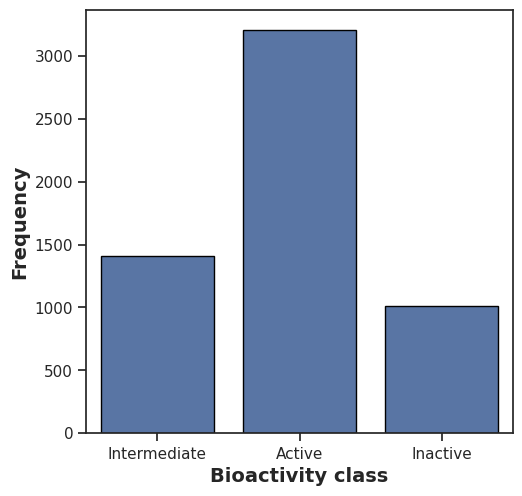

In [ ]:
# Building the graph

plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='bioactivity_class', data=df_final, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


## Salvando o gráfico no formato pdf
plt.savefig('plot_bioactivity_class.pdf')

# Creating the scatter plot of molecular weight versus LogP

# Building the Box Plot graph of bioactivity versus pIC5 values

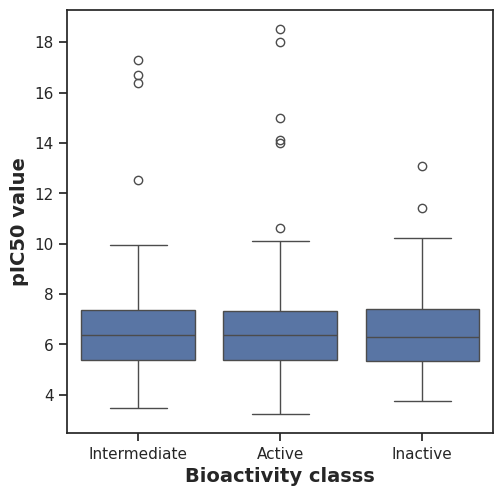

In [ ]:
## Building the graph

plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_final)
plt.xlabel('Bioactivity classs', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')


## Saving the chart
plt.savefig('plot_ic50.pdf')

## Comparing molecular weight values ​​between the two classes of compounds: Mann Witney Test

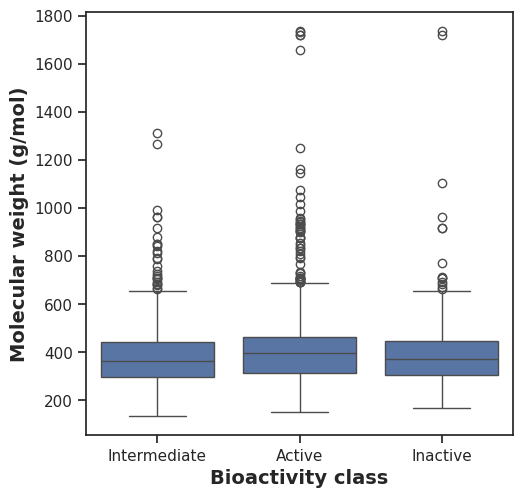

In [ ]:
# Molecular weight
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Molecular weight (g/mol)', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL303519,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,Intermediate,342.446,3.37000,0.0,4.0,5.008774
1,CHEMBL292943,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,Active,360.461,3.47440,0.0,5.0,7.301030
2,CHEMBL61682,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,Active,365.427,4.34900,0.0,3.0,7.602060
3,CHEMBL64487,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,Active,360.461,3.47440,0.0,5.0,6.443697
4,CHEMBL64597,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,Active,336.464,3.52730,0.0,5.0,6.522879
...,...,...,...,...,...,...,...,...
5623,CHEMBL4864918,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(Cl)c...,Inactive,479.068,5.46902,1.0,4.0,6.563837
5624,CHEMBL5398630,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(C)c3...,Active,472.677,5.43246,1.0,4.0,6.647817
5625,CHEMBL3183055,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3cccc(Cl)c...,Active,513.513,6.12242,1.0,4.0,6.202040
5626,CHEMBL2017291,CCCn1c(-c2ccccc2)cc(C(=O)NCCCN2CCN(c3ccc(Cl)c(...,Inactive,549.974,6.54422,1.0,4.0,6.489455


## Comparing LogP values ​​between the two classes of compounds: Mann Witney Test

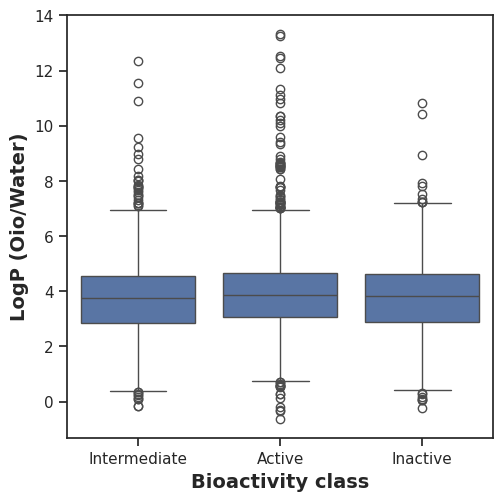

In [ ]:
# LogP
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP (Oio/Water)', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

# Comparing the number of hydrogen bond donor groups between the two classes of compounds: Mann Witney test

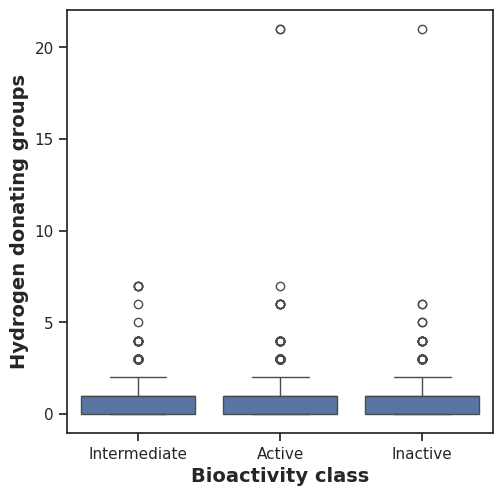

In [ ]:
# Hydrogen bond donating groups
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Hydrogen donating groups', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

# Comparing the number of hydrogen bond acceptor groups between the two classes of compounds: Mann Witney test

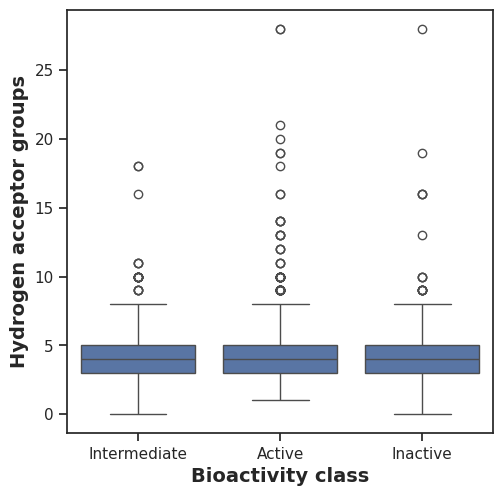

In [ ]:
# Hydrogen bond acceptor groups
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Hydrogen acceptor groups', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from random import seed
from scipy.stats import kruskal
import pandas as pd

# Seed the random number generator
seed(1)

# Define the list of quantitative descriptors
quantitative_vars = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']

# Initialize an empty list to collect results
all_results = []

# Loop through each quantitative variable to perform the Kruskal-Wallis test and plot
for descriptor in quantitative_vars:
    # Separate the dataset into groups based on the bioactivity class
    ativo = df_final[df_final.bioactivity_class == 'Active'][descriptor]
    inativo = df_final[df_final.bioactivity_class == 'Inactive'][descriptor]
    intermediario = df_final[df_final.bioactivity_class == 'Intermediate'][descriptor]

    # Perform the Kruskal-Wallis test
    stat, p = kruskal(ativo, inativo, intermediario)

    # Interpret the result
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distributions (reject H0)'

    # Store the results
    results = {
        'Descriptor': descriptor,
        'Statistics': stat,
        'p': p,
        'alpha': alpha,
        'Interpretation': interpretation
    }
    all_results.append(results)

    # Plot the box plot for the current descriptor
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='bioactivity_class', y=descriptor, data=df_final, palette='Set2')
    plt.title(f'Box Plot of {descriptor} by Bioactivity Class')
    plt.xlabel('Bioactivity Class')
    plt.ylabel(descriptor)

    # Save the plot as a PNG file
    plot_filename = f'boxplot_{descriptor}.png'
    plt.savefig(plot_filename)
    plt.close()

    # Save each result to a separate CSV file
    filename = f'kruskal_{descriptor}.csv'
    pd.DataFrame([results]).to_csv(filename, index=False)

# Convert all results to a DataFrame and return
final_results_df = pd.DataFrame(all_results)
final_results_df.to_csv('kruskal_all_results.csv', index=False)

final_results_df

<ipython-input-35-aa17e4f31662>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y=descriptor, data=df_final, palette='Set2')
<ipython-input-35-aa17e4f31662>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y=descriptor, data=df_final, palette='Set2')
<ipython-input-35-aa17e4f31662>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y=descriptor, data=df_final, palette='Set2')
<ipython-input-35-aa17e4f31662>:45: FutureWarning: 

Passing `palette` without assigning `hue` is

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,63.583892,1.559313e-14,0.05,Different distributions (reject H0)
1,LogP,16.044391,3.280989e-04,0.05,Different distributions (reject H0)
2,NumHDonors,10.604700,4.979877e-03,0.05,Different distributions (reject H0)
3,NumHAcceptors,28.560258,6.283749e-07,0.05,Different distributions (reject H0)
4,pIC50,0.633692,7.284431e-01,0.05,Same distribution (fail to reject H0)


# EXPLORATORY ANALYSIS: CONCLUSIONS

In [ ]:
# Considering the pIC50 analysis, the values ​​of active and bioactive compounds were statistically different. These results were already expected;
# The threshld was 6, that is, bioactive compounds: pIC50>6; inactive compounds: pIC50<6;
# Two other lipinsk descriptors (Wolecular weight, logP, hydrogen repting and donating groups) also showed similar results;
# Overall, we can conclude that the three classes of compounds meet the drug-likeness characteristics proposed by Pfizer Pharmaceuticals;
# Deep analysis using supervised machine learning models (regression) is warranted.

# Lastly, saving (zipping) all files generated in this Jupyter notebook

In [ ]:
! zip -r resultados.zip . -i *.csv *.pdf

  adding: kruskal_NumHDonors.csv (deflated 12%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: kruskal_LogP.csv (deflated 10%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 36%)
  adding: plot_LogP.pdf (deflated 36%)
  adding: kruskal_MW.csv (deflated 9%)
  adding: kruskal_pIC50.csv (deflated 11%)
  adding: kruskal_NumHAcceptors.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: DA_5HT_concatenated_data.csv (deflated 82%)
  adding: Histamine_dataset_3classes.csv (deflated 77%)
  adding: kruskal_all_results.csv (deflated 47%)
  adding: Dopamine_serotonin_concatenated_data.csv (deflated 82%)
